In [4]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
# Upload 'insurance.csv' file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("insurance.csv")
df.head()

Saving insurance.csv to insurance (1).csv


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
# Step 3: Handle missing values by replacing them with mean (only numeric columns)
numeric_features = ['age', 'bmi', 'children', 'charges']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())


In [7]:
# Step 4: Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [8]:
# Step 5: Set up OneHotEncoder for categorical variables
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy trap
    ],
    remainder='passthrough'  # Keep the numeric columns as they are
)

In [9]:
# Step 6: Create a pipeline: Preprocessing + Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [10]:
# Step 7: Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Fit the pipeline model
pipeline.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = pipeline.predict(X_test)

In [11]:
# Step 10: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
# Step 11: Extract model coefficients and intercept
regressor = pipeline.named_steps['regressor']
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numerical_features = [col for col in X.columns if col not in categorical_features]
all_feature_names = np.concatenate([onehot_feature_names, numerical_features])


In [13]:
# Create a summary table
coefficients_table = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': regressor.coef_
})

# Model Intercept
intercept = regressor.intercept_

In [14]:
# Step 12: Output Results
print("R^2 Score:", round(r2, 4))
print("Model Intercept:", round(intercept, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("\nModel Coefficients:")
print(coefficients_table)

R^2 Score: 0.7696
Model Intercept: -12124.1334
Mean Absolute Error (MAE): 4131.5105
Root Mean Squared Error (RMSE): 5811.6998

Model Coefficients:
            Feature   Coefficient
0          sex_male    125.769487
1        smoker_yes  23636.893270
2  region_northwest   -479.197817
3  region_southeast   -892.679970
4  region_southwest   -888.777642
5               age    261.929552
6               bmi    338.732514
7          children    419.370610


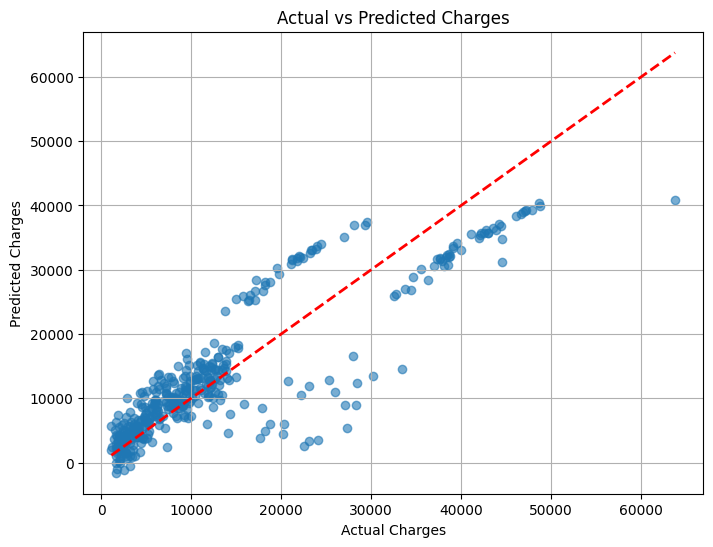

In [15]:
# Step 13: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()